# Introduction to LangGraph

## What if I want to move my graph flow from a node to another node based on a *condition*
Now the question I have is, what I want to connect nodes in such a way that, the node flow will continue based on a certain condition (a decision). Can we do that in *LangGraph*. I am curious. Let's explore. 

Let me think of a scenario. Lets say, I want a graph which is a very basic calculator. A very basic calcultor, which means it can only add or subtract. Even that it can do for only two numbers. That's all. So the expected flow is as follows. 
+ You as the name of the user
+ Ask for the operation I need to carry out. In this case either "add" or "subtract"
+ Then ask for the two numbers (number1 and number2)
+ Carry on with the operation and give the final answer, with a personalized response. 

This usecase, I can try to implement it in two ways to make it more engaging. 
+ #1: I give all the needed input at the time the *graph* is *invoked*
+ #2: I ask for information while the *graph* is running

In either of the way, there is a very interesting thing I need to clarify. Which is can we pass the process flow to nodes based on a condition. In this case, if the operation is addition, the flow to pass down to the *addition_node* otherwise to the *subtract_node*. Let's me findout. 

what I found was, that we can make use of a special type of *edge* called *conditional_edge* in *langgraph* to accomplish this. Just like we use a python function to define the *action* of a *graph node*, we need to define a python function to define how the decision is taken in the *conditional edge*. Therefore we need an extra function to define the conditional edge behavior. 

I am going to start with the #1 way. Let me first define the steps. 
+ import the modules
+ Define the *Graph State* variable
+ Define the *node functions*. 
    + `decision_node`: node which decides which node to pass the processing to. 
    + `addition_node`: node which does the addition part
    + `subtraction_node`: node which does the subtracting part
+ Define the conditional edge function
+ setup the entry point and finish points. 
+ Visualize the graph
+ Define an input
+ invoke the graph. 


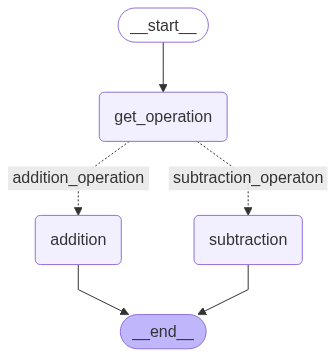

In [ ]:
# #1 Option Code
# import the modules
from typing import TypedDict, List 
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# define the state graph
class AgentState(TypedDict):
    name: str
    number1: int
    number2: int
    operation: str
    result: int 

# Defining the addition node
def addition(state: AgentState) -> AgentState:
    print("Addtion Node")
    print(f'Current State: {state}')
    state['result'] = state['number1'] + state['number2']
    print(f"{state['name']}, the result of {state['number1']} + {state['number2']} is {state['result']}")
    return state
# Defining the subtraction node
def subtraction(state: AgentState) -> AgentState:
    print("Subtraction Node")
    print(f'Current State: {state}')
    state['result'] = state['number1'] - state['number2']
    print(f"{state['name']}, the result of {state['number1']} - {state['number2']} is {state['result']}")
    return state
def get_operation(state: AgentState) -> AgentState:
    print("Get Operation Node")
    print(f'Current State: {state}')
    state['operation'] = input(f"{state['name']}, please enter the operation (+ or -): ")
    return state
def conditional_decision(state: AgentState) -> str:
    print("Conditional Decision Node")
    print(f'Current State: {state}')
    if state['operation'] == '+':
        print("Decision: Addition Operation")
        return 'addition_operation'
    elif state['operation'] == '-':
        print("Decision: Subtraction Operation")
        return 'subtraction_operaton'

graph = StateGraph(AgentState)
graph.add_node('get_operation', get_operation)
graph.add_node('addition', addition)
graph.add_node('subtraction', subtraction)
graph.add_edge(START, 'get_operation')
graph.add_edge('subtraction', END)
graph.add_edge('addition', END)


graph.add_conditional_edges(
    'get_operation', # the node where the conditional decision is taken to evaluate
    conditional_decision, # the function to evaluate the condition
    # the mapping of the return values of the conditional function to the next nodes
    {
        'addition_operation': 'addition', # the next node if the condition output is addition_operation
        'subtraction_operaton': 'subtraction' # the next node if the condition output is subtraction_operaton
    }
)

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))



In [2]:
initial_state = AgentState(
    name='eranga',
    number1=5,
    number2=3,    
)

answer = app.invoke(initial_state) 

Get Operation Node
Current State: {'name': 'eranga', 'number1': 5, 'number2': 3}
Conditional Decision Node
Current State: {'name': 'eranga', 'number1': 5, 'number2': 3, 'operation': '+'}
Decision: Addition Operation
Addtion Node
Current State: {'name': 'eranga', 'number1': 5, 'number2': 3, 'operation': '+'}
eranga, the result of 5 + 3 is 8


In [13]:
print(f"Final Result: {answer}")

Final Result: {'name': 'eranga', 'number1': 5, 'number2': 3, 'operation': '+'}


Now let me try to code the #2 option, where we ask the use for some of the inputs. 

To make a little more clearer, let me try to add another extra node, which gets the inputs from the user. 

I am going to start with the #1 way. Let me first define the steps. 
+ import the modules
+ Define the *Graph State* variable
+ Define the *node functions*. 
    + `get_inputs`: node which gets the inputs from the user
    + `decision_node`: node which decides which node to pass the processing to. 
    + `addition_node`: node which does the addition part
    + `subtraction_node`: node which does the subtracting part
+ Define the conditional edge function
+ setup the entry point and finish points. 
+ Visualize the graph
+ Define an input
+ invoke the graph. 


In [2]:
# #2 Option Code